In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("Dataset.xlsx")

In [2]:
df.sample(5)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender
1753,61.0,76.0,77.0,83.0,High,No,Consistency in your approach to assignments is...,14,Poor,5.526843,Female
6965,91.0,41.0,92.0,74.0,Medium,No,Your commitment to improvement is evident in y...,14,Good,3.286643,Female
8377,89.0,49.0,95.0,85.0,High,No,Your attention to detail could use improvement...,5,Poor,10.526846,Female
4359,88.0,64.0,93.0,77.0,Medium,No,Collaborative efforts could be more impactful ...,3,Poor,8.134420,Male
2877,86.0,66.0,67.0,98.0,High,No,Your positive influence in group settings is n...,1,Good,10.332255,Female


In [3]:
df.shape#cheak shape of dataset

(10000, 11)

In [4]:
df.isnull().sum()#cheak null values

Test1                      492
Test2                      500
Test3                      500
Attendance                 500
Interest                     0
Attrition                    0
Teacher_feedback            33
Study Hours per Week         0
Health Status                0
Distance_From_Institute    100
Gender                       0
dtype: int64

In [5]:
#now we cheak a mean of numerical column where missing values are present
df["Test1"].mean()

62.366848969289016

In [6]:
df["Test2"].mean()

59.898736842105265

In [7]:
df["Test3"].mean()

59.87884210526316

In [8]:
df["Attendance"].mean()

66.028

In [9]:
df["Distance_From_Institute"].mean()

9.999597850448385

In [10]:
#use simple imputer to fill null values
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='mean')

In [11]:
Num_column = ["Test1","Test2","Test3","Attendance","Distance_From_Institute"]

In [12]:
# Fit the imputer on the numerical columns and transform the DataFrame
df[Num_column] = si.fit_transform(df[Num_column])

In [13]:
df.isnull().sum()/len(df)#cheak null values in percentage

Test1                      0.0000
Test2                      0.0000
Test3                      0.0000
Attendance                 0.0000
Interest                   0.0000
Attrition                  0.0000
Teacher_feedback           0.0033
Study Hours per Week       0.0000
Health Status              0.0000
Distance_From_Institute    0.0000
Gender                     0.0000
dtype: float64

In [14]:
#now only Teacher column is remaining so we use forward fill
df.ffill(inplace=True)
df.isnull().sum()/len(df)

Test1                      0.0
Test2                      0.0
Test3                      0.0
Attendance                 0.0
Interest                   0.0
Attrition                  0.0
Teacher_feedback           0.0
Study Hours per Week       0.0
Health Status              0.0
Distance_From_Institute    0.0
Gender                     0.0
dtype: float64

In [15]:
#now we sucessfully handle Null values now we cheak for outlier
df.describe()

,Test1,Test2,Test3,Attendance,Study Hours per Week,Distance_From_Institute
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,62.366849,59.898737,59.878842,66.028000,10.066600,9.999598
std,30.128651,25.293806,25.268166,29.496648,5.504234,5.039292
min,0.000000,0.000000,0.000000,0.000000,1.000000,-8.905131
25%,45.000000,44.000000,44.000000,63.000000,5.000000,6.626184
50%,62.366849,60.000000,60.000000,74.000000,10.000000,9.999598
75%,82.000000,80.000000,80.000000,87.000000,15.000000,13.406809
max,199.000000,100.000000,100.000000,100.000000,19.000000,29.692515


<Axes: xlabel='Test1'>

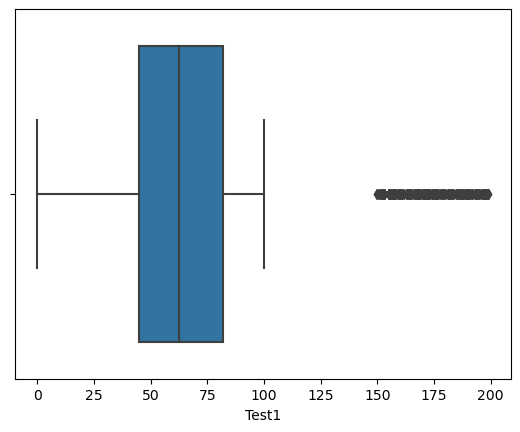

In [16]:
#there is max number is 199 in test 1 cheak using boxplot for more detail
sns.boxplot(x='Test1',data=df)

In [17]:
#we use Z_score
# Calculate the Z-scores for the 'Test1' column
z_scores = (df['Test1'] - df['Test1'].mean()) / df['Test1'].std()#formula of Z score
threshold = 2
outlier = (z_scores.abs() > threshold)
df = df[~outlier]

<Axes: xlabel='Test1'>

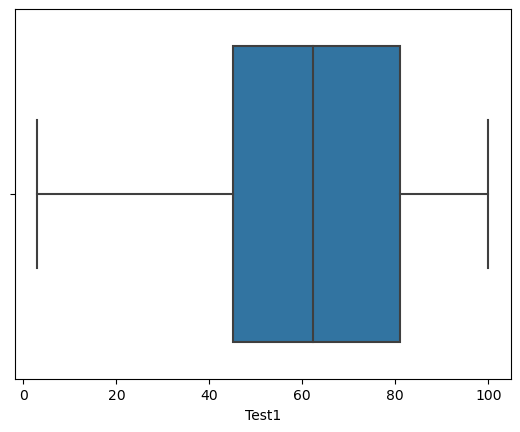

In [18]:
sns.boxplot(x='Test1',data=df)#now we dont have outlier

In [19]:
df["Test1"].max()#maximun number is 100

100.0

In [20]:
df.shape

(9640, 11)

<Axes: xlabel='Test2'>

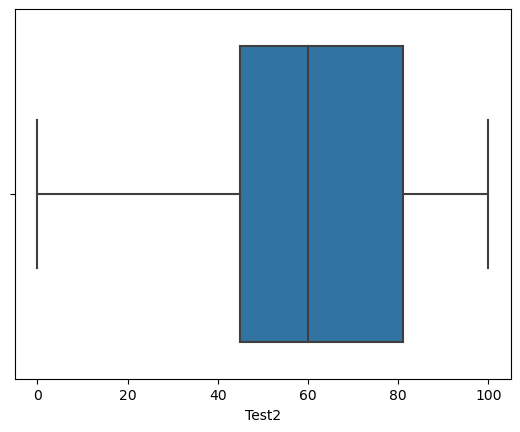

In [21]:
#now we cheak for other column also
sns.boxplot(x = "Test2",data = df)

In [22]:
df["Test2"].max()#max number is 100

100.0

<Axes: xlabel='Test3'>

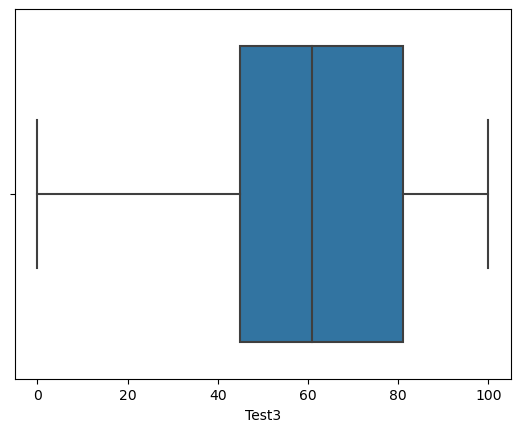

In [23]:
sns.boxplot(x ='Test3',data=df)

In [24]:
df["Test3"].max()

100.0

<Axes: xlabel='Attendance'>

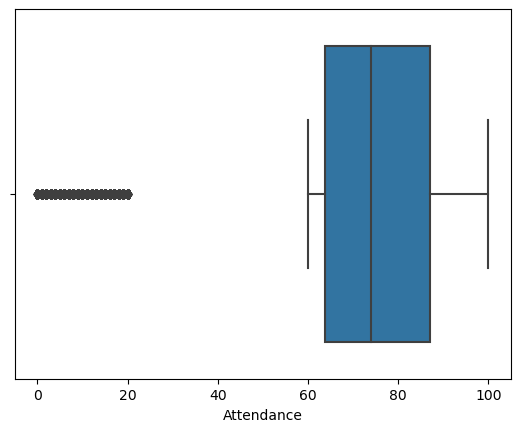

In [25]:
sns.boxplot(x ='Attendance',data=df)#in attendance column is ok and that outlier is important

<Axes: xlabel='Study Hours per Week'>

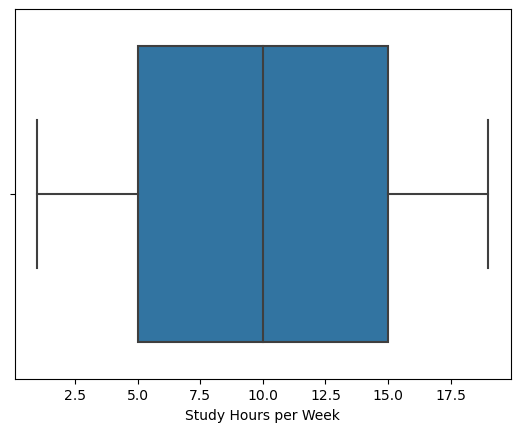

In [26]:
sns.boxplot(x ='Study Hours per Week',data=df)#no outlier is here

<Axes: xlabel='Distance_From_Institute'>

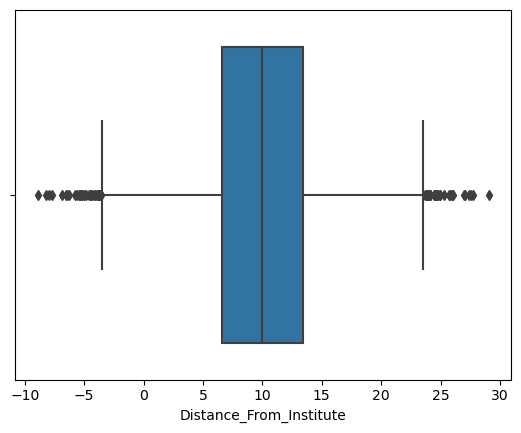

In [27]:
sns.boxplot(x ='Distance_From_Institute',data=df)

In [28]:
# so according to boxplot we have getting negative value in distance column
# so we adjust that using absolute function
df['Distance_From_Institute'] = df['Distance_From_Institute'].abs()

<Axes: xlabel='Distance_From_Institute'>

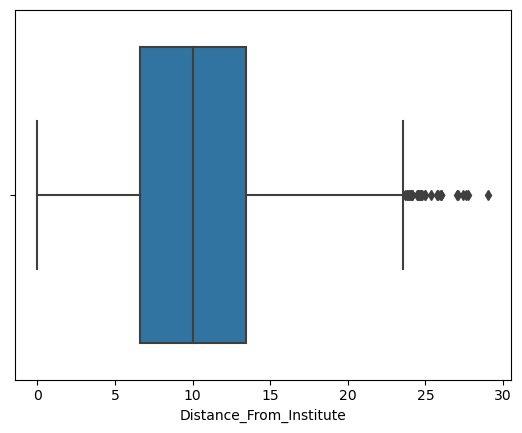

In [29]:
sns.boxplot(x='Distance_From_Institute',data=df)

In [30]:
df['Distance_From_Institute'].max()#approximately 30km is fine

29.04582553608971

In [31]:
df.columns

Index(['Test1', 'Test2', 'Test3', 'Attendance', 'Interest', 'Attrition',
       'Teacher_feedback', 'Study Hours per Week', 'Health Status',
       'Distance_From_Institute', 'Gender'],
      dtype='object')

In [32]:
df.sample(5)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender
9192,58.0,59.0,75.0,74.0,Medium,No,Your consistent focus on improvement is eviden...,5,Average,5.865267,Male
70,67.0,66.0,60.0,67.0,Low,No,Your commitment to personal and academic growt...,15,Average,11.683672,Male
337,70.0,56.0,66.0,82.0,High,No,Your recent project showcases creativity and t...,10,Average,8.544387,Male
4468,93.0,45.0,53.0,65.0,Low,No,A more proactive and structured approach is re...,6,Average,9.094764,Male
998,76.0,53.0,96.0,90.0,High,No,Your dedication to continuous learning is admi...,3,Average,10.429359,Male


In [33]:
#convert Gender column in number
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.sample(2)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender
3827,97.0,98.0,93.0,78.0,Medium,No,Your engagement in class discussions is apprec...,16,Poor,16.586661,1
5423,68.0,45.0,45.0,85.0,High,No,Your collaborative efforts could be more impac...,8,Average,9.999598,1


In [34]:
#use label encoding to convert Attrition column into number
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Attrition'] = label_encoder.fit_transform(df['Attrition'])


In [35]:
df.sample(2)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender
854,97.0,74.0,60.0,90.0,High,0,Your engagement in class discussions is apprec...,2,Good,11.480500,0
2522,4.0,30.0,12.0,8.0,Low,1,Your positive contributions to class discussio...,15,Average,10.246294,1


In [36]:
# now we convert interest and health status using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High'], ['Poor', 'Average', 'Good']])

df[['Interest', 'Health Status']] = ordinal_encoder.fit_transform(df[['Interest', 'Health Status']])


In [37]:
df.sample(5)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender
3498,64.0,58.0,62.0,87.0,2.0,0,Exceptional problem-solving skills; your criti...,1,0.0,6.666203,1
8119,24.0,17.0,19.0,6.0,0.0,1,Collaborative efforts could be more impactful ...,9,1.0,12.716959,0
5212,38.0,32.0,27.0,19.0,0.0,1,It seems there's room for improvement in your ...,12,2.0,4.753832,0
6895,59.0,93.0,60.0,87.0,2.0,0,Consistency in effort is key for sustained imp...,1,0.0,13.752838,0
5828,8.0,22.0,31.0,11.0,0.0,1,Your recent presentations are engaging; consid...,13,2.0,8.355762,0


In [38]:
df.corr()

,Test1,Test2,Test3,Attendance,Interest,Attrition,Study Hours per Week,Health Status,Distance_From_Institute,Gender
Test1,1.000000,0.573389,0.575360,0.706659,0.417787,-0.716961,0.019471,0.004584,0.016956,0.005715
Test2,0.573389,1.000000,0.575726,0.700833,0.418666,-0.712567,0.003493,0.010488,0.009697,0.001582
Test3,0.575360,0.575726,1.000000,0.706916,0.414932,-0.716228,0.015565,0.002641,0.008039,-0.003030
Attendance,0.706659,0.700833,0.706916,1.000000,0.771239,-0.860724,0.021529,-0.008542,0.016968,0.002472
Interest,0.417787,0.418666,0.414932,0.771239,1.000000,-0.619427,0.016714,-0.011693,0.010947,0.006635
Attrition,-0.716961,-0.712567,-0.716228,-0.860724,-0.619427,1.000000,-0.013066,0.007705,-0.011042,0.002588
Study Hours per Week,0.019471,0.003493,0.015565,0.021529,0.016714,-0.013066,1.000000,0.003592,-0.003205,-0.008403
Health Status,0.004584,0.010488,0.002641,-0.008542,-0.011693,0.007705,0.003592,1.000000,-0.005736,-0.007829
Distance_From_Institute,0.016956,0.009697,0.008039,0.016968,0.010947,-0.011042,-0.003205,-0.005736,1.000000,0.018366
Gender,0.005715,0.001582,-0.003030,0.002472,0.006635,0.002588,-0.008403,-0.007829,0.018366,1.000000


In [39]:

correlation_matrix = df[['Test1', 'Test2','Test3', 'Interest', 'Attrition',"Attendance"]].corr()
print(correlation_matrix)
#cheaking correlation using correlation matrix

               Test1     Test2     Test3  Interest  Attrition  Attendance
Test1       1.000000  0.573389  0.575360  0.417787  -0.716961    0.706659
Test2       0.573389  1.000000  0.575726  0.418666  -0.712567    0.700833
Test3       0.575360  0.575726  1.000000  0.414932  -0.716228    0.706916
Interest    0.417787  0.418666  0.414932  1.000000  -0.619427    0.771239
Attrition  -0.716961 -0.712567 -0.716228 -0.619427   1.000000   -0.860724
Attendance  0.706659  0.700833  0.706916  0.771239  -0.860724    1.000000


In [40]:
df.shape

(9640, 11)

In [41]:
#now we have only categorical column is Teacher_feedback for that we use NLP
df["Teacher_feedback"].isnull().value_counts()#cheaking for missing values in that column


False    9640
Name: Teacher_feedback, dtype: int64

In [42]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()


In [44]:
# Function to get sentiment score for a feedback
def get_sentiment_score(feedback):
    return sia.polarity_scores(feedback)['compound']


In [45]:
# Apply sentiment analysis to the entire teacher feedback column
df['sentiment_score'] = df['Teacher_feedback'].apply(get_sentiment_score)

# Display the DataFrame with sentiment scores
print(df[['Teacher_feedback', 'sentiment_score']])


                                       Teacher_feedback  sentiment_score
0     Your recent presentation was solid; consider a...           0.1531
1     Your recent presentations are engaging; consid...           0.3400
2     Your problem-solving skills are strong; keep t...           0.5574
4     Your recent presentations could benefit from m...           0.4588
5     You have a positive attitude in class; aim to ...           0.5574
...                                                 ...              ...
9995  Your enthusiasm for learning is contagious. It...           0.5267
9996  Your work is generally thoughtful; let's discu...           0.3818
9997  Impressive work ethic! Your diligence in meeti...           0.5562
9998  Your recent performance falls below expectatio...           0.4588
9999  Well done on your recent project; let's build ...           0.7561

[9640 rows x 2 columns]


In [46]:
df.sample(3)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender,sentiment_score
150,47.0,77.0,54.0,63.0,0.0,1,Your positive contributions create a collabora...,12,2.0,10.474149,0,0.6908
3123,29.0,22.0,35.0,16.0,0.0,1,Your positive influence in group settings is n...,13,1.0,16.020002,0,0.7845
5469,46.0,82.0,67.0,97.0,2.0,0,Outstanding effort! You consistently go above ...,1,1.0,8.130646,0,0.6476


In [47]:
df.corr()

,Test1,Test2,Test3,Attendance,Interest,Attrition,Study Hours per Week,Health Status,Distance_From_Institute,Gender,sentiment_score
Test1,1.000000,0.573389,0.575360,0.706659,0.417787,-0.716961,0.019471,0.004584,0.016956,0.005715,-0.005143
Test2,0.573389,1.000000,0.575726,0.700833,0.418666,-0.712567,0.003493,0.010488,0.009697,0.001582,-0.001813
Test3,0.575360,0.575726,1.000000,0.706916,0.414932,-0.716228,0.015565,0.002641,0.008039,-0.003030,0.007202
Attendance,0.706659,0.700833,0.706916,1.000000,0.771239,-0.860724,0.021529,-0.008542,0.016968,0.002472,-0.002059
Interest,0.417787,0.418666,0.414932,0.771239,1.000000,-0.619427,0.016714,-0.011693,0.010947,0.006635,0.001722
Attrition,-0.716961,-0.712567,-0.716228,-0.860724,-0.619427,1.000000,-0.013066,0.007705,-0.011042,0.002588,0.002907
Study Hours per Week,0.019471,0.003493,0.015565,0.021529,0.016714,-0.013066,1.000000,0.003592,-0.003205,-0.008403,0.006530
Health Status,0.004584,0.010488,0.002641,-0.008542,-0.011693,0.007705,0.003592,1.000000,-0.005736,-0.007829,0.017924
Distance_From_Institute,0.016956,0.009697,0.008039,0.016968,0.010947,-0.011042,-0.003205,-0.005736,1.000000,0.018366,0.002305
Gender,0.005715,0.001582,-0.003030,0.002472,0.006635,0.002588,-0.008403,-0.007829,0.018366,1.000000,-0.003637


In [48]:
#now we drop column which have less relation with attrition
df.drop(['sentiment_score'],axis=1,inplace=True)
df.sample(3)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute,Gender
9374,95.0,51.0,45.0,90.0,2.0,0,Your positive impact on group dynamics is noti...,13,0.0,15.810596,1
2986,86.0,50.0,75.0,95.0,2.0,0,Addressing challenges requires a more structur...,4,1.0,8.852572,0
6708,76.0,82.0,77.0,90.0,2.0,0,Your dedication to continuous learning is admi...,12,1.0,9.403001,0


In [49]:
df.drop(['Gender'],axis=1,inplace=True)
df.sample(3)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Teacher_feedback,Study Hours per Week,Health Status,Distance_From_Institute
5615,80.000000,49.000000,69.000000,67.000,0.0,0,You have a knack for making complex topics acc...,12,0.0,4.935848
7358,79.000000,45.000000,86.000000,91.000,2.0,0,Your recent projects demonstrate creativity an...,2,2.0,5.881743
7786,62.366849,59.898737,59.878842,66.028,2.0,0,Your recent submissions indicate a need for mo...,10,1.0,9.674530


In [50]:
df.drop(['Teacher_feedback'],axis=1,inplace=True)
df.sample(3)

,Test1,Test2,Test3,Attendance,Interest,Attrition,Study Hours per Week,Health Status,Distance_From_Institute
8922,16.0,30.0,10.0,8.0,0.0,1,13,0.0,7.316797
7330,59.0,63.0,91.0,63.0,0.0,0,12,1.0,15.089248
6668,56.0,41.0,67.0,94.0,2.0,0,7,2.0,8.113761


In [51]:
df.drop(['Study Hours per Week', 'Distance_From_Institute', 'Health Status'], axis=1,inplace = True)
df.sample(3)

,Test1,Test2,Test3,Attendance,Interest,Attrition
6778,61.0,79.0,86.0,76.0,1.0,0
9956,85.0,47.0,73.0,81.0,2.0,0
910,49.0,91.0,71.0,74.0,1.0,0


In [52]:
df["Attrition"].value_counts()#so the dataset is imbalance

0    7528
1    2112
Name: Attrition, dtype: int64

In [53]:
#avoid imbalance problem we use concept of class_weight to build model

In [54]:
#now we use logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR = LogisticRegression(random_state=42, class_weight='balanced')

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1502
           1       0.94      1.00      0.97       426

    accuracy                           0.99      1928
   macro avg       0.97      0.99      0.98      1928
weighted avg       0.99      0.99      0.99      1928



In [55]:
#similarly we use naive bayes
from sklearn.naive_bayes import GaussianNB

X = df.drop('Attrition', axis=1)
y = df['Attrition']


NB = GaussianNB()

NB.fit(X_train, y_train)


y_pred = NB.predict(X_test)


print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1502
           1       0.93      1.00      0.96       426

    accuracy                           0.98      1928
   macro avg       0.97      0.99      0.98      1928
weighted avg       0.98      0.98      0.98      1928



In [56]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Attrition', axis=1)
y = df['Attrition']


DT = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1502
           1       0.96      0.98      0.97       426

    accuracy                           0.99      1928
   macro avg       0.98      0.98      0.98      1928
weighted avg       0.99      0.99      0.99      1928

